In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Retrieving the Data

In [6]:
# Importing the data
df_disorders = pd.read_csv("Clean_data/cleaned_diffdisorders.csv")
df_disorders.head()


,Entity,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,latitude,longitude
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,33.768006,66.238514
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,33.768006,66.238514
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,33.768006,66.238514
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,33.768006,66.238514
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,33.768006,66.238514


In [8]:
df_disorders.dtypes

Entity               object
Year                  int64
Schizophrenia       float64
Bipolar_disorder    float64
Eating_disorder     float64
Anxiety             float64
Drug_usage          float64
Depression          float64
Alcohol             float64
latitude            float64
longitude           float64
dtype: object

In [9]:
df_disorders.isnull().sum()

Entity              0
Year                0
Schizophrenia       0
Bipolar_disorder    0
Eating_disorder     0
Anxiety             0
Drug_usage          0
Depression          0
Alcohol             0
latitude            0
longitude           0
dtype: int64

In [10]:
#There are no missing values, so there is no need to clean the data

C:\Users\patri\AppData\Local\Temp\ipykernel_9780\4288871660.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_disorders.hist(ax=ax)


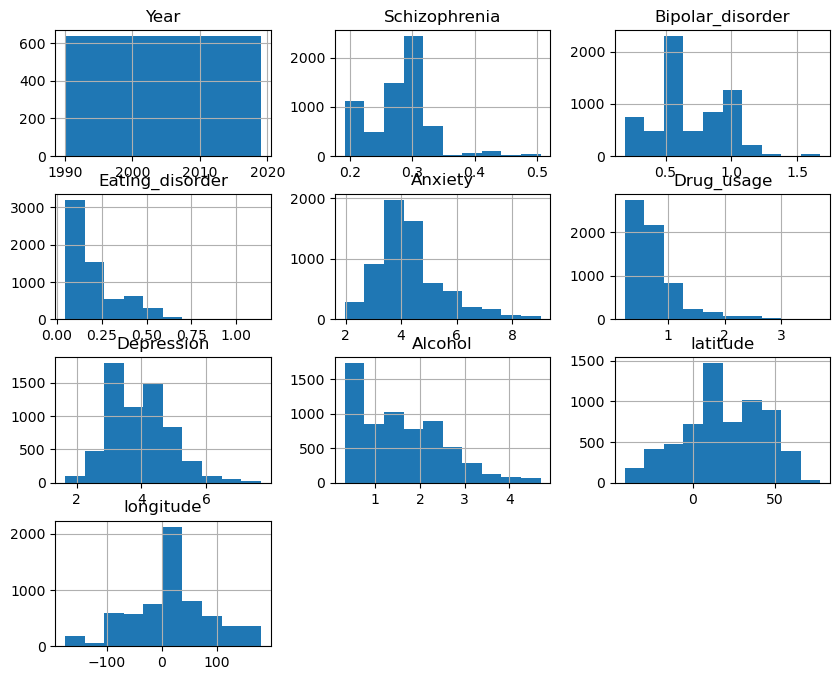

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
df_disorders.hist(ax=ax)
plt.show()

# Splitting the Data into Training and Testing Sets

In [12]:
# Defining the X (features) and y (target) sets
y = df_disorders["Schizophrenia"].values
X = df_disorders.drop("Schizophrenia", axis = 1)

In [13]:
X.head()

,Entity,Year,Bipolar_disorder,Eating_disorder,Anxiety,Drug_usage,Depression,Alcohol,latitude,longitude
0,Afghanistan,1990,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,33.768006,66.238514
1,Afghanistan,1991,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,33.768006,66.238514
2,Afghanistan,1992,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,33.768006,66.238514
3,Afghanistan,1993,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,33.768006,66.238514
4,Afghanistan,1994,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,33.768006,66.238514


In [14]:
np.unique(y)

array([0.19162102, 0.1916237 , 0.19162641, ..., 0.50568355, 0.50598724,
       0.50601816])

In [15]:
# Splitting the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


## Creating, Fitting and Comparing Models

# Logistic Regression Model

In [16]:
# Training a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 1000)
classifier

LogisticRegression(max_iter=1000)

In [17]:
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Belgium'

In [ ]:
print("train data score: ", classifier.score(X_train, y_train))
print("test data score: ", classifier.score(X_test, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

In [ ]:
y_true = y_test
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_true,y_pred)
cm

In [ ]:
print(classification_report(y_true, y_pred))

In [ ]:
tn, fp, fn, tp = cm.ravel()

In [ ]:
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")

In [ ]:
# Calculating the precision of the model based on the confusion matrix

precision = tp/ (tp + fp)
precision

In [ ]:
# Calculating the sensitivity of the model based on the confusion matrix

sensitivity = tp / (tp + fn)
sensitivity

In [ ]:
# Calculating the F1 score of the model based on the confusion matrix

f1 = 2* precision * sensitivity/ (precision + sensitivity)
f1

# Random Forest Classifier model

In [ ]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Preparing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training a Random Forest Classifier model and printing the model score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
feature_importances = clf.feature_importances_

In [ ]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()


plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

In [ ]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')